<a href="https://colab.research.google.com/github/Ruqyai/Colab/blob/master/example_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Learning Objectives:

    

*   Load and read data from **csv file**
*   Use Pandas library
*  Explore the data and check if there are null values
* Decide which column is the label column and check if it has discrete or continuous values
* Choose a Model
* Build, Train, and Evaluate Your Model

# Regression Example

> [Visual example](http://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=2,1&seed=0.38918&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=regression&initZero=false&hideText=false)






Predict student performance in secondary education (high school).

 [Data Set Description](https://archive.ics.uci.edu/ml/datasets/student+performance)

 Please download the dataset  from [Dataset download link](https://www.kaggle.com/dipam7/student-grade-prediction/downloads/student-grade-prediction.zip/1)



###Import libraries




In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

### Upload the dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving student-mat.csv to student-mat (1).csv


###Load the dataset

In [0]:
df = pd.read_csv('student-mat.csv')

##Data Exploration

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [5]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [7]:
# We need to represents the categorical values as numerical values
columns  = df.columns;
for coloumn in columns :
    if (not str(df[coloumn].dtype).startswith("int")):
            print("column Name ",coloumn, " Type ", df[coloumn].dtype)
            print("Unique values for ", coloumn , df[coloumn].unique() , "\n")
            values = df[coloumn].unique()
            convertor = dict(zip(values,range(len(values))))
            df[coloumn] = [float(convertor[item]) for item in df[coloumn]]

column Name  school  Type  object
Unique values for  school ['GP' 'MS'] 

column Name  sex  Type  object
Unique values for  sex ['F' 'M'] 

column Name  address  Type  object
Unique values for  address ['U' 'R'] 

column Name  famsize  Type  object
Unique values for  famsize ['GT3' 'LE3'] 

column Name  Pstatus  Type  object
Unique values for  Pstatus ['A' 'T'] 

column Name  Mjob  Type  object
Unique values for  Mjob ['at_home' 'health' 'other' 'services' 'teacher'] 

column Name  Fjob  Type  object
Unique values for  Fjob ['teacher' 'other' 'services' 'health' 'at_home'] 

column Name  reason  Type  object
Unique values for  reason ['course' 'other' 'home' 'reputation'] 

column Name  guardian  Type  object
Unique values for  guardian ['mother' 'father' 'other'] 

column Name  schoolsup  Type  object
Unique values for  schoolsup ['yes' 'no'] 

column Name  famsup  Type  object
Unique values for  famsup ['no' 'yes'] 

column Name  paid  Type  object
Unique values for  paid ['no' 'yes'

In [8]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.0,18,0.0,0.0,0.0,4,4,0.0,0.0,0.0,0.0,2,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3,4,1,1,3,6,5,6,6
1,0.0,0.0,17,0.0,0.0,1.0,1,1,0.0,1.0,0.0,1.0,1,2,0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5,3,3,1,1,3,4,5,5,6
2,0.0,0.0,15,0.0,1.0,1.0,1,1,0.0,1.0,1.0,0.0,1,2,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4,3,2,2,3,3,10,7,8,10
3,0.0,0.0,15,0.0,0.0,1.0,4,2,1.0,2.0,2.0,0.0,1,3,0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,3,2,2,1,1,5,2,15,14,15
4,0.0,0.0,16,0.0,0.0,1.0,3,3,2.0,1.0,2.0,1.0,1,2,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4,3,2,1,2,5,4,6,10,10


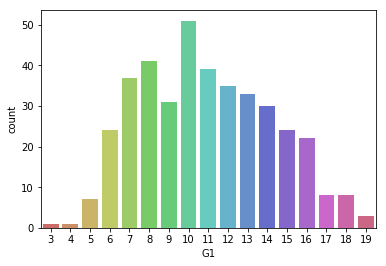

In [9]:
sb.countplot(x='G1',data=df, palette='hls')

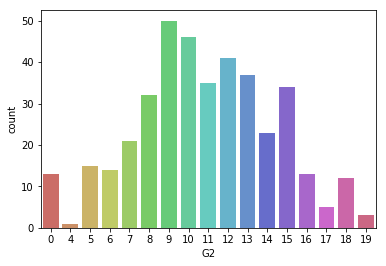

In [10]:
sb.countplot(x='G2',data=df, palette='hls')

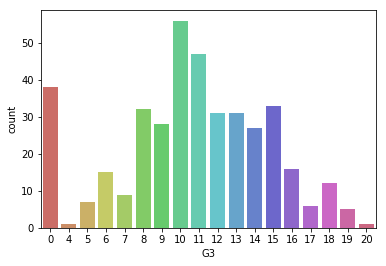

In [11]:
sb.countplot(x='G3',data=df, palette='hls')

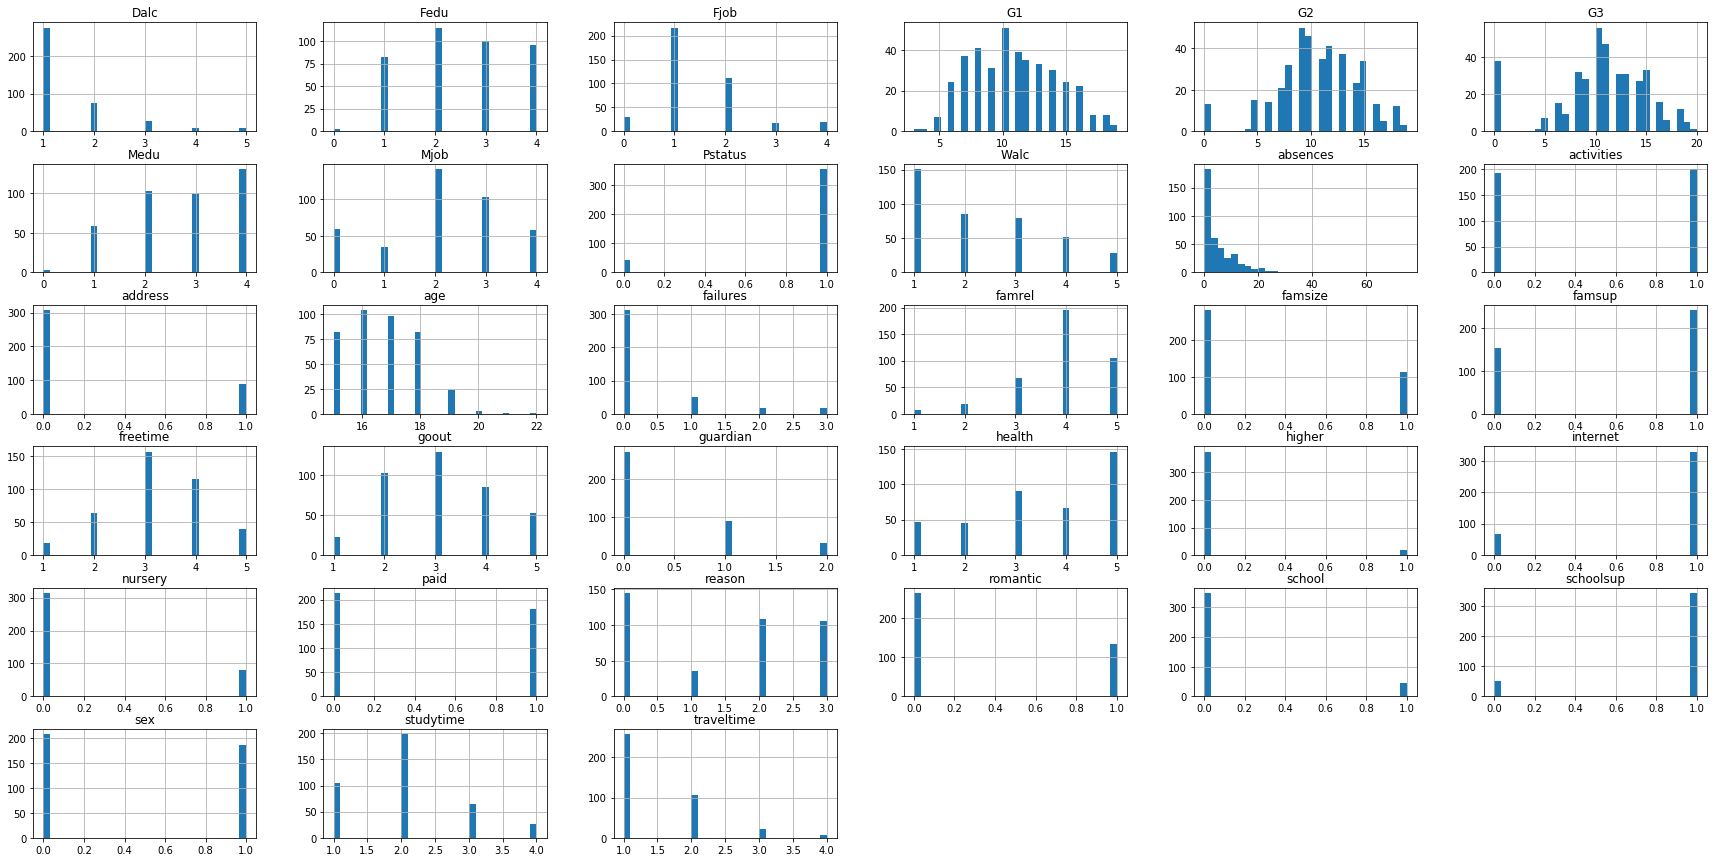

In [12]:
df.hist(bins=30,figsize=(30,15)) 
plt.show()

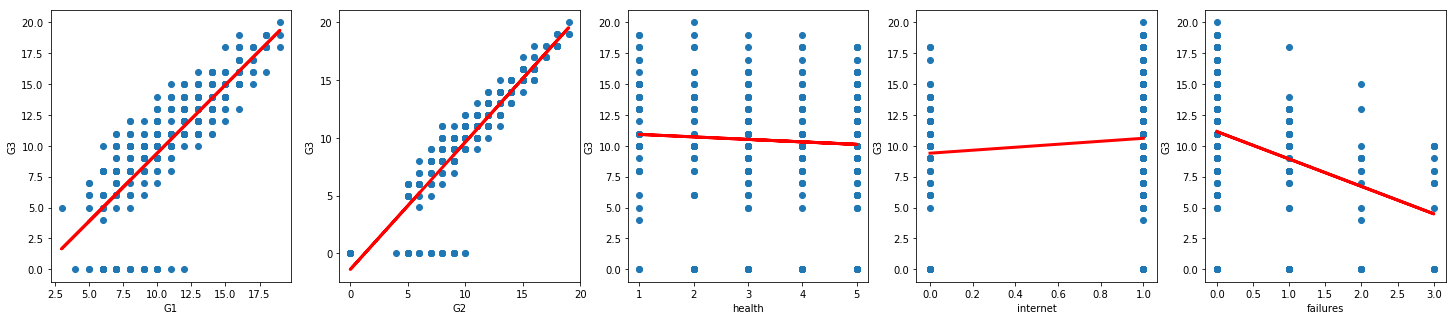

In [13]:
plt.figure(figsize=(25,5))

plt.subplot(151)#subplot to add a subplot to the current figure
plt.scatter(df['G1'], df['G3']) # show data as scatter plot of y vs x
plt.xlabel('G1') #Set the label for the x-axis
plt.ylabel('G3') #Set the label for the y-axis
m,b = np.polyfit(df['G1'], df['G3'],1) #To find m and b for (y = mx+b)
plt.plot(df['G1'],m * df['G1']+b, lw=3, color='red') # To draw the line..notice df['clounm']= x , m*df['clounm']+b = y
          
plt.subplot(152)
plt.scatter(df['G2'], df['G3'])
plt.xlabel('G2')
plt.ylabel('G3')
m,b = np.polyfit(df['G2'], df['G3'],1)
plt.plot(df['G2'],m * df['G2']+ b, lw=3, color='red')
          
                    
plt.subplot(153)
plt.scatter(df['health'], df['G3'])
plt.xlabel('health')  
plt.ylabel('G3')  
m,b = np.polyfit(df['health'], df['G3'],1)
plt.plot(df['health'],m * df['health']+ b , lw=3, color='red')

plt.subplot(154)
plt.scatter(df['internet'], df['G3'])
plt.xlabel('internet')
plt.ylabel('G3')
m,b = np.polyfit(df['internet'], df['G3'],1)
plt.plot(df['internet'],m * df['internet']+ b, lw=3, color='red')


plt.subplot(155)
plt.scatter(df['failures'], df['G3'])
plt.xlabel('failures')
plt.ylabel('G3')
m,b = np.polyfit(df['failures'], df['G3'],1)
plt.plot(df['failures'],m * df['failures']+ b, lw=3, color='red')
          
plt.show()  #Display a figure
          

In [14]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.222785,0.288608,0.896203,2.749367,2.521519,2.169620,1.450633,1.440506,0.389873,1.448101,2.035443,0.334177,0.870886,0.612658,0.458228,0.508861,0.205063,0.050633,0.832911,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.227473,0.889572,1.231309,0.633176,0.697505,0.839240,0.743651,0.335751,0.487761,0.498884,0.500555,0.404260,0.219525,0.373528,0.472300,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,0.000000,0.000000,17.000000,0.000000,0.000000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,0.000000,1.000000,18.000000,0.000000,1.000000,1.000000,4.000000,3.000000,3.000000,2.000000,3.000000,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [15]:
print('max final grade : ', df['G3'].max())
print('min final grade : ', df['G3'].min())
print('mean final grade :',df['G3'].mean())

max final grade :  20
min final grade :  0
mean final grade : 10.415189873417722


## Select Features

In [16]:
# drop features that you don't need
df = df.drop(['school','address', 'reason'], axis =1)
df.head()

,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,18,0.0,0.0,4,4,0.0,0.0,0.0,2,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3,4,1,1,3,6,5,6,6
1,0.0,17,0.0,1.0,1,1,0.0,1.0,1.0,1,2,0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5,3,3,1,1,3,4,5,5,6
2,0.0,15,1.0,1.0,1,1,0.0,1.0,0.0,1,2,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4,3,2,2,3,3,10,7,8,10
3,0.0,15,0.0,1.0,4,2,1.0,2.0,0.0,1,3,0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,3,2,2,1,1,5,2,15,14,15
4,0.0,16,0.0,1.0,3,3,2.0,1.0,1.0,1,2,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4,3,2,1,2,5,4,6,10,10




##Start Building a Model



1. **Input data**

In [0]:
labels = df['G3'].values
features = df.drop(['G3'],axis=1).values

2. **Spilt data**

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(276, 29) (119, 29) (276,) (119,)



   3. **Bulid, Compile, Train and Evaluate the Model**


In [19]:
# Build The structure of Model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(19, activation='relu'),
                             tf.keras.layers.Dense(19, activation='relu'),
                             tf.keras.layers.Dense(19, activation='relu'),
                             tf.keras.layers.Dense(19, activation='relu'),
                             tf.keras.layers.Dense(1) ,
])

# Compile the Model
model.compile(
             loss='mse', # Mean Square Error
             optimizer='RMSProp', # Root Mean Square Prop
             metrics=['mae']) # Mean Absolute Error

# Train the Model
model.fit(X_train, y_train, epochs=100)

# Evaluate
model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)



W0728 07:39:26.553148 139802957191040 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/100
276/276 [==============================] - 0s 511us/sample - loss: 121.0407 - mean_absolute_error: 10.0215
Epoch 2/100
276/276 [==============================] - 0s 62us/sample - loss: 87.3743 - mean_absolute_error: 8.5030
Epoch 3/100
276/276 [==============================] - 0s 62us/sample - loss: 56.3577 - mean_absolute_error: 6.7596
Epoch 4/100
276/276 [==============================] - 0s 91us/sample - loss: 32.8304 - mean_absolute_error: 5.0038
Epoch 5/100
276/276 [==============================] - 0s 55us/sample - loss: 19.5143 - mean_absolute_error: 3.6579
Epoch 6/100
276/276 [==============================] - 0s 62us/sample - loss: 14.6414 - mean_absolute_error: 2.9727
Epoch 7/100
276/276 [==============================] - 0s 61us/sample - loss: 12.0307 - mean_absolute_error: 2.6215
Epoch 8/100
276/276 [==============================] - 0s 58us/sample - loss: 9.7907 - mean_absolute_error: 2.3070
Epoch 9/100
276/276 [==============================] - 0s 57us/sample 

[2.3591687599150073, 1.0402335]

4. **Predict**

In [23]:
# Predict 
predict = model.predict(X_test)
idx= np.random.choice(X_test.shape[0]) 
print ("Predicted final grade : ", predict[idx])
print ("Real final grade : ", y_test[idx])

Predicted final grade :  [13.165231]
Real final grade :  13


5. **Visualize**

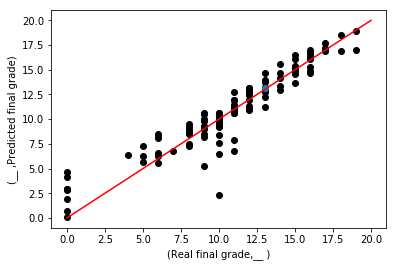

In [24]:
# visualization
plt.scatter(y_test, predict,  color='black')
plt.scatter(y_test[idx], predict[idx])
plt.xlabel('(Real final grade,__ )')
plt.ylabel('(__ ,Predicted final grade)')
plt.plot([0, 20], [0, 20], color='red')


#Exercises

Reset All runtimes before you start doing your exercises

   >  **Runtime >> Reset All runtimes**



Please **download** the dataset  from [Dataset download link](https://drive.google.com/open?id=1utkLWLMg3lPr_7otetfn06HXAq5mGQmv) then rename some column and make some cells null

In [0]:
'''
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# TODO : Load the dataset that already downloaded it from the link 

# TODO : save the file in Data Frame df

# TODO : show the first 10 rows 

# TODO : show if there are any null values

# TODO : show the information about the dataset

# TODO : choose 2 columns and show them as a graph

# TODO : drop some columns that you think you don't need them
'''